In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
housing = fetch_california_housing(as_frame=True).frame
housing.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [83]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
housing.shape

(20640, 9)

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [ ]:
def getMetrics(X, y, random_seed=42, model=None, test_size=0.2):
    if model is None:
        model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_train = r2_score(y_train, y_pred_train)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)

    print(rmse_train, r2_train, rmse_test, r2_test)

In [31]:
X = housing.loc[:, housing.columns != "MedHouseVal"]
y = housing[["MedHouseVal"]]
getMetrics(X, y)

0.7196757085831575 0.6125511913966952 0.7455813830127761 0.5757877060324511


<Axes: ylabel='MedInc'>

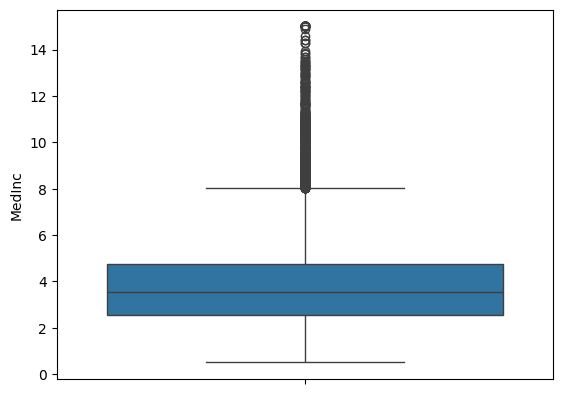

In [ ]:
sns.boxplot(housing['MedInc'])

<Axes: ylabel='HouseAge'>

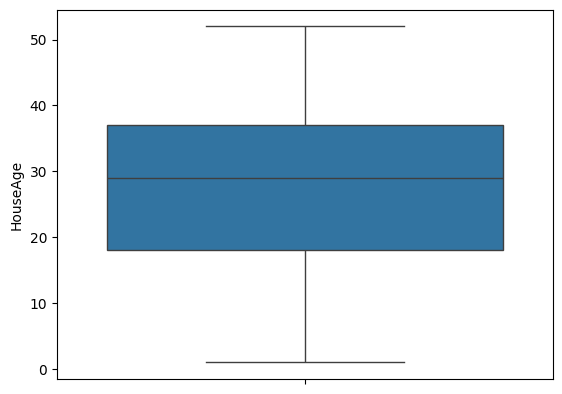

In [23]:
sns.boxplot(housing['HouseAge'])

<Axes: ylabel='Population'>

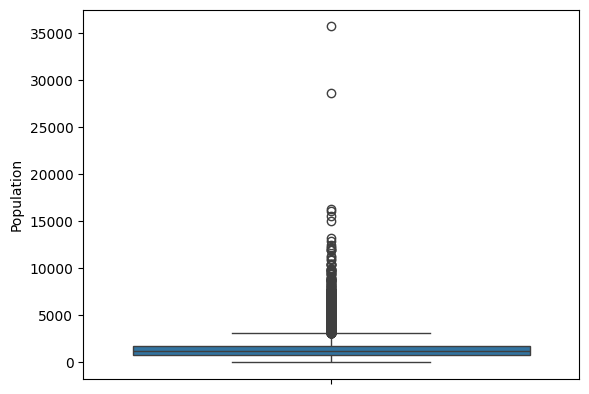

In [22]:
sns.boxplot(housing['Population'])

In [92]:
housing.Population.quantile(0.98)

np.float64(4573.6600000000035)

In [ ]:
housing_short = housing.query('Population>4573')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,place
283,1.789240,4.690416,14.098627,1.041179,4985.0,16.277302,37.79,-122.16,3.710,-4616.4264
570,2.029595,2.236068,14.772995,1.061442,7427.0,20.402901,37.72,-122.24,3.507,-4610.8928
576,1.982848,3.464102,15.285002,1.018934,5781.0,23.898288,37.77,-122.06,3.416,-4610.2062
780,1.339491,4.242641,11.283145,1.043679,5613.0,23.996982,37.63,-122.10,1.872,-4594.6230
799,0.922591,4.690416,9.048530,1.036227,5436.0,51.298583,37.64,-122.07,1.349,-4594.7148
...,...,...,...,...,...,...,...,...,...,...
20529,1.085358,3.464102,10.853134,1.022451,5633.0,18.289261,38.55,-121.78,2.043,-4694.6190
20530,1.143299,3.316625,11.155976,1.015530,7984.0,19.584226,38.57,-121.76,2.018,-4696.2832
20544,0.725130,4.795832,10.620633,1.013646,6330.0,41.251023,38.55,-121.76,2.194,-4693.8480
20563,1.139434,3.000000,11.415606,1.119593,6837.0,24.376163,38.67,-121.75,1.325,-4708.0725


<Axes: ylabel='AveOccup'>

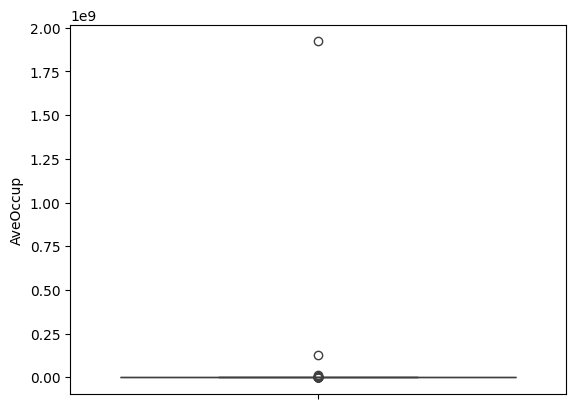

In [107]:
sns.boxplot(housing['AveOccup'])

In [113]:
housing.AveOccup.quantile(0.98)

np.float64(762.8521747951337)

<Axes: >

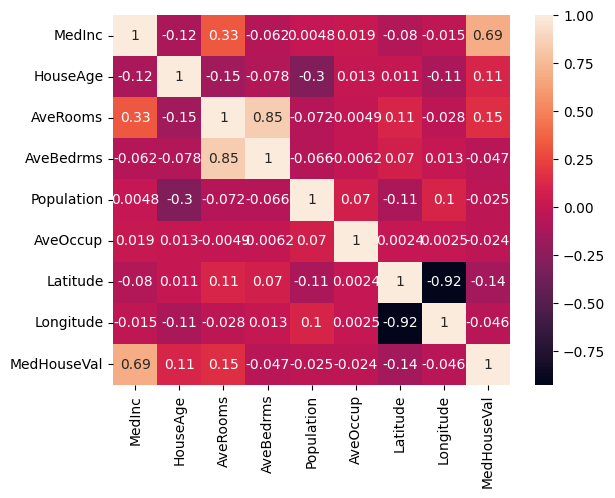

In [25]:
corr_matrix = housing.corr()
sns.heatmap(corr_matrix, annot=True)

In [32]:
X2 = housing.loc[:, (housing.columns != "MedHouseVal")&(housing.columns != "AveBedrms")]
y2 = housing[["MedHouseVal"]]
getMetrics(X2, y2)

0.7316746485880744 0.5995238502055928 0.7398151789804083 0.5823239094526445


In [ ]:
new_housing = housing[housing.MedHouseVal < 4.8]
X3 = new_housing.loc[:, (new_housing.columns != "MedHouseVal")&(new_housing.columns != "AveBedrms")]
y3 = new_housing[["MedHouseVal"]]
getMetrics(X3, y3)

0.6287729767152345 0.5613063197672397 0.6453735362820614 0.5539677335460962


In [45]:
housing = fetch_california_housing(as_frame=True).frame
housing['AveOccup'] = np.sqrt(housing['AveOccup'])
housing['HouseAge'] = np.power(housing['HouseAge'], 2)
housing['MedInc'] = np.power(housing['MedInc'], 3)

In [46]:
X4 = housing.loc[:, housing.columns != "MedHouseVal"]
y4 = housing[["MedHouseVal"]]
getMetrics(X4, y4)

0.8203304652681309 0.49659407498404695 0.797870027083831 0.5142000774648812


In [47]:
housing = fetch_california_housing(as_frame=True).frame
housing['AveOccup'] = np.sqrt(housing['AveOccup'])
housing['HouseAge'] = np.power(housing['HouseAge'], 2)
housing['MedInc'] = np.log(housing['MedInc'])

In [48]:
X5 = housing.loc[:, housing.columns != "MedHouseVal"]
y5 = housing[["MedHouseVal"]]
getMetrics(X5, y5)

0.7551562958591195 0.5734063989475802 0.7655337638642559 0.5527793586984726


In [49]:
housing = fetch_california_housing(as_frame=True).frame
housing['AveOccup'] = np.sqrt(housing['AveOccup'])
housing['HouseAge'] = np.power(housing['HouseAge'], 2)
housing['MedInc'] = np.log(housing['MedInc'])
housing['place'] = housing['Latitude']*housing['Longitude']

In [50]:
X6 = housing.loc[:, (housing.columns != "MedHouseVal")&(housing.columns != "Longitude")&(housing.columns != "Latitude")]
y6 = housing[["MedHouseVal"]]
getMetrics(X6, y6)

0.8155642660955122 0.5024267554140185 0.8225535125129707 0.48367701062633917


Получили на тестовых данных даже лучшие результаты, чем на тренировочных по среднеквадратичной ошибке

In [71]:
housing = fetch_california_housing(as_frame=True).frame
housing['AveOccup'] = np.power(housing['AveOccup'], 3)
housing['HouseAge'] = np.sqrt(housing['HouseAge'])
housing['MedInc'] = np.log(housing['MedInc'])
housing['place'] = housing['Latitude']*housing['Longitude']
housing['AveRooms'] = housing['AveBedrms']+2*housing['AveRooms']

In [72]:
X7 = housing.loc[:, (housing.columns != "MedHouseVal")&(housing.columns != "Longitude")&(housing.columns != "Latitude")&(housing.columns != 'AveBedrms')]
y7 = housing[["MedHouseVal"]]
getMetrics(X7, y7)

0.8424075807713404 0.46913367836009545 0.8442226285323029 0.4561149546741209


In [105]:
housing = fetch_california_housing(as_frame=True).frame
housing = housing.query('Population>4573')
housing['AveOccup'] = np.power(housing['AveOccup'], 3)
housing['HouseAge'] = np.sqrt(housing['HouseAge'])
housing['MedInc'] = np.log(housing['MedInc'])

In [106]:
X8 = housing.loc[:, (housing.columns != "MedHouseVal")]
y8 = housing[["MedHouseVal"]]
getMetrics(X8, y8)

0.6190106137846936 0.5460653807401992 0.48348473411560333 0.6827182848708834


In [122]:
housing = fetch_california_housing(as_frame=True).frame
housing = housing.query('Population>4573')
housing = housing.loc[housing.AveOccup<housing.AveOccup.quantile(0.99)]
housing['AveOccup'] = np.power(housing['AveOccup'], 2)
housing['HouseAge'] = np.sqrt(housing['HouseAge'])
housing['MedInc'] = np.log(housing['MedInc'])

In [123]:
X9 = housing.loc[:, (housing.columns != "MedHouseVal")]
y9 = housing[["MedHouseVal"]]
getMetrics(X9, y9)

0.6212538316939583 0.5599664709861778 0.43417829970105654 0.6944248532953319


Модель выдает R**2 почти 70%, т.е. является удовлетворительной для использования